In [1]:
import zadeh

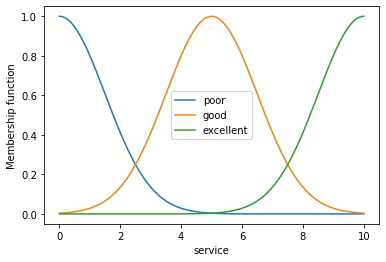

In [2]:
service = zadeh.FuzzyVariable(
    zadeh.FloatDomain("service", 0, 10, 100),
    {
        "poor": zadeh.GaussianFuzzySet(1.5, 0),
        "good": zadeh.GaussianFuzzySet(1.5, 5),
        "excellent": zadeh.GaussianFuzzySet(1.5, 10),
    },
)
service.plot()

In [ ]:
rule_set = [
    ((service == "poor") | (food == "rancid")) >> (tip == "cheap"),
    (service == "good") >> (tip == "average"),
    ((service == "excellent") | (food == "delicious")) >> (tip == "generous"),
]


rule_set

In [9]:
import fuzzylogic
from matplotlib import pyplot
from fuzzylogic.classes import Domain
from fuzzylogic.functions import R, S, alpha

In [8]:
pyplot.rc("figure", figsize=(10, 10))

In [10]:
T = Domain("test", 0, 30, res=0.1)

In [12]:
T.up = R(1,10)
T.down = S(20, 29)

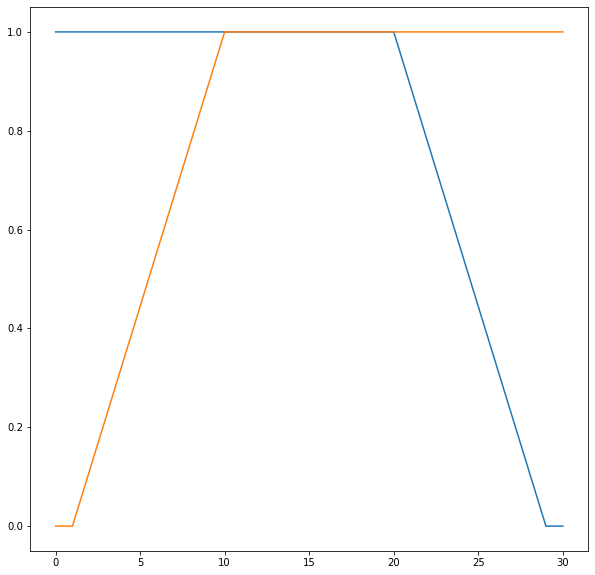

In [14]:
T.down.plot()
T.up.plot()

In [28]:
from fuzzylogic.classes import Domain
from fuzzylogic.functions import alpha, triangular, bounded_linear
from fuzzylogic.hedges import plus, minus, very

In [29]:
numbers = Domain("numbers", 0, 20, res=0.1)

close_to_10 = alpha(floor=0.2, ceiling=0.8, func=triangular(0, 20))
close_to_5 = triangular(1, 10)

numbers.foo = close_to_5
numbers.bar = close_to_10
numbers.bounded = bounded_linear(1, 10)

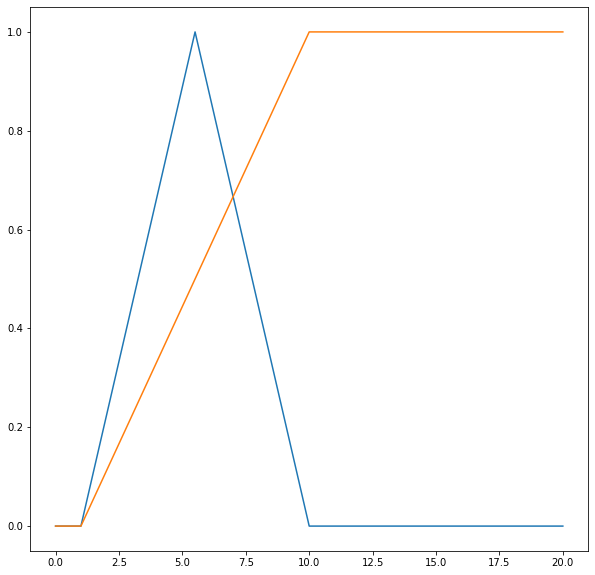

In [30]:
numbers.foo.plot()
numbers.bounded.plot()

In [43]:
d = numbers(8)
d

{Set(<function triangular.<locals>.f at 0x11dc62700>): 0.4444444444444444,
 Set(<function alpha.<locals>.f at 0x11dc625e0>): 0.8,
 Set(<function bounded_linear.<locals>.f at 0x11dc629d0>): 0.7777777777777777}

In [44]:
slope = Domain("slope", -90, 90, res=0.01)

In [51]:
22.5/2

11.25

In [97]:
slope.quickly_decreasing = S(-90+11.25, -90+32.5)
slope.decreasing = triangular(-77.5, -35)
slope.slowly_decreasing = triangular(-55, -12.5)
slope.constant = triangular(-32.5, 32.5)
slope.slowly_increasing = triangular(12.5, 55)
slope.increasing = triangular(35, 77.5)
slope.quickly_increasing = R(90-32.5, 90-11.25)

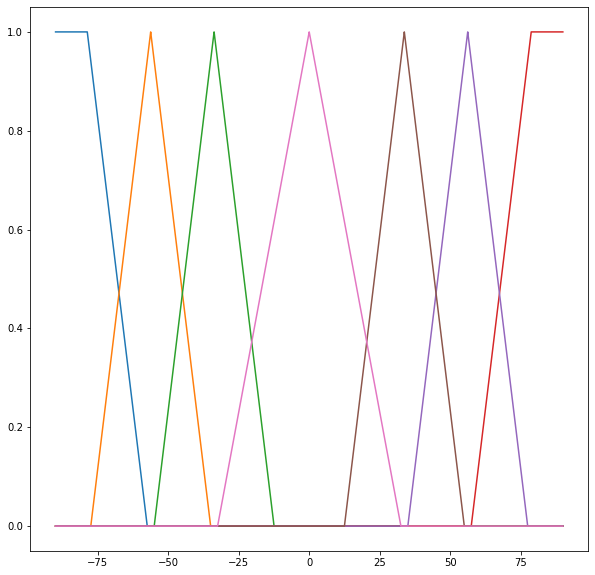

In [98]:
slope.quickly_decreasing.plot()
slope.decreasing.plot()
slope.slowly_decreasing.plot()
slope.quickly_increasing.plot()
slope.increasing.plot()
slope.slowly_increasing.plot()
slope.constant.plot()

In [133]:
series = [i for i in range(90)]
length = len(series)

In [178]:
def fuzzy_slope(series):
    
    total_sum = {'quickly decreasing' : [],
                 'decreasing' : [],
                 'slowly decreasing' : [],
                 'constant' : [],
                 'slowly increasing' : [],
                 'increasing' : [],
                 'quickly increasing' : []}

    for i in series:
        total_sum['quickly decreasing'].append(round(slope.quickly_decreasing(i), 2))
        total_sum['decreasing'].append(round(slope.decreasing(i), 2))
        total_sum['slowly decreasing'].append(round(slope.slowly_decreasing(i), 2))
        total_sum['constant'].append(round(slope.constant(i), 2))
        total_sum['slowly increasing'].append(round(slope.slowly_increasing(i), 2))
        total_sum['increasing'].append(round(slope.increasing(i), 2))
        total_sum['quickly increasing'].append(round(slope.quickly_increasing(i), 2))
        
    number_of_segments = len(series)
    
    n = 0
    
    for i in total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x)))):
        if i != 0:
            n += 1
    
    return max(total_sum, key = lambda x: sum(total_sum.get(x))), sum(total_sum.get(max(total_sum, key = lambda x: sum(total_sum.get(x))))), round((n/number_of_segments), 2)

In [179]:
fuzzy_slope(series)[0]

'quickly increasing'

In [180]:
def quantifier(value):
    
    quantifier = {
    'Almost all of ' : 0,
    'Most of ' : 0,
    'At least a half of ' : 0,
    'Some of ' : 0,
    'None of ' : 0
    }

    if value > 0.85:
        quantifier['Almost all of '] += 1
    if value > 0.7:
        quantifier['Most of '] += 1
    if value > 0.5:
        quantifier['At least a half of '] += 1
    if value > 0:
        quantifier['Some of '] += 1
    if value == 0:
        quantifier['None of '] += 1

    quantifier = max(quantifier, key = quantifier.get)

    return quantifier 

In [181]:
quantifier(fuzzy_slope(series)[2])

'Some of '

In [182]:
def summary(series, fuzzy_func, quantifier):
    
    elementA0 = '{{quantifier_related_to_first_variable}}'
    elementA1 = 'trends are '
    elementA2 = '{{slope_variable}}'
    elementA3 = '.'
    
    fuzzy = fuzzy_func(series)[2]
    elementA0 = quantifier(fuzzy)
    elementA2 = fuzzy_func(series)[0]
    
    sentence = elementA0 + elementA1 + elementA2 + elementA3
    
    return sentence

In [183]:
summary(series, fuzzy_slope, quantifier)

'Some of trends are quickly increasing.'